# Market Basket Analysis Project

## Description
This project focuses on conducting a market basket analysis to discover associations and relationships between products or items purchased by customers. Market basket analysis is commonly used in retail and e-commerce to identify frequently co-occurring items and make informed business decisions.

The project can be approached through the following steps:

1. **Data Collection**: Gather transactional data that includes customer purchases or orders. This data should consist of records with customer IDs and the items purchased in each transaction.

2. **Data Preprocessing**: Preprocess the transactional data by removing any irrelevant information and ensuring data integrity. Organize the data into a suitable format for market basket analysis, such as the transactional format or a matrix representation.

3. **Association Rule Mining**: Apply association rule mining techniques, such as the Apriori algorithm or FP-growth, to discover frequent itemsets and association rules. Frequent itemsets represent items that are frequently purchased together, while association rules specify relationships between itemsets based on support and confidence measures.

4. **Rule Evaluation**: Evaluate the discovered association rules using appropriate metrics, such as support, confidence, and lift. Filter and select relevant and interesting rules based on predefined thresholds or business requirements.

5. **Visualization and Interpretation**: Visualize the discovered associations and rules using graphical representations, such as a network graph or a heatmap. Interpret the findings and extract meaningful insights that can drive business decisions, such as product placement, cross-selling strategies, or personalized recommendations.

6. **Deployment and Monitoring**: Deploy the market basket analysis model to generate insights on new transactional data. Continuously monitor and update the analysis as new data becomes available to ensure the relevance and effectiveness of the derived associations.

**Note**: Customize the project to suit your specific needs and domain. Consider factors like minimum support and confidence thresholds, rule filtering techniques, and any additional business-specific requirements or constraints.


This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the dataset
df = pd.read_excel('./data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Checking if the invoice number is cancelled or not
df_aux = df[df['InvoiceNo'].astype(str).str.contains('C')]
df_aux.shape

(9288, 8)

In [8]:
# Deleting the cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


In [9]:
# Checking if there are any negative values in the quantity column
df[df['Quantity'] < 0].shape

(1336, 8)

In [10]:
# Deleting the negative values in the quantity column
df = df[df['Quantity'] > 0]
# Checking if there are any negative values in the unit price column
df[df['UnitPrice'] < 0].shape

(2, 8)

In [11]:
df.shape

(531285, 8)

In [12]:
# Checking the values in stock code column
df['StockCode'].value_counts()


85123A    2270
85099B    2115
22423     2019
47566     1707
20725     1595
          ... 
22016        1
84963B       1
85031B       1
85031C       1
23843        1
Name: StockCode, Length: 3941, dtype: int64

In [13]:
# Delete the rows where the stock code is a word
df = df[~df['StockCode'].astype(str).str.contains('^[a-zA-Z]+', regex=True)]
df.shape

(528886, 8)

In [14]:
# Checking the values in description column
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
                                      ... 
BLACK GLASS/SHELL/PEARL NECKLACE         1
PINK PAINTED KASHMIRI CHAIR              1
GOLD COSMETICS BAG WITH BUTTERFLY        1
BAKING MOULD TOFFEE CUP  CHOCOLATE       1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4055, dtype: int64

In [15]:
words_to_delete = [ "check", "check?", "?", "??", "damaged", "found",
          "adjustment", "Amazon", "AMAZON", "amazon adjust",
          "Amazon Adjustment", "amazon sales", "Found", "FOUND",
          "found box", "Found by jackie ", "Found in w/hse", "dotcom",
          "dotcom adjust", "allocate stock for dotcom orders ta", "FBA",
          "Dotcomgiftshop Gift Voucher £100.00", "on cargo order",
          "wrongly sold (22719) barcode", "wrongly marked 23343",
          "dotcomstock", "rcvd be air temp fix for dotcom sit", "Manual",
          "John Lewis", "had been put aside", "for online retail orders",
          "taig adjust", "amazon", "incorrectly credited C550456 see 47",
          "returned", "wrongly coded 20713", "came coded as 20713",
          "add stock to allocate online orders", "Adjust bad debt",
          "alan hodge cant mamage this section", "website fixed",
          "did  a credit  and did not tick ret", "michel oops",
          "incorrectly credited C550456 see 47", "mailout", "test",
          "Sale error",  "Lighthouse Trading zero invc incorr", "SAMPLES",
          "Marked as 23343", "wrongly coded 23343","Adjustment",
          "rcvd be air temp fix for dotcom sit", "Had been put aside."]

In [16]:
# Delete the values in the description column that matches with the list of words

df = df[~df["Description"].isin(words_to_delete)]
df.shape


(528724, 8)

In [17]:
# Check for Nan Values in Description
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       584
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132354
Country             0
dtype: int64

In [18]:
# Drop de Na in Description column
df = df.dropna(subset = ["Description"])

In [19]:
df.shape

(528140, 8)

In [20]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [21]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131770
Country             0
dtype: int64

In [22]:
# Set 'Description' and 'Country' as category
df["Description"] = df["Description"].astype("category")
df["Country"] = df["Country"].astype("category")

# Change 'InvoiceNo' type to int
df["InvoiceNo"] = df["InvoiceNo"].astype("int")

In [23]:
# Extract 'Date' and 'Time' from 'InvoiceDate'
df["Date"] = df["InvoiceDate"].dt.date
df["Time"] = df["InvoiceDate"].dt.time

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528140 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528140 non-null  int32         
 1   StockCode    528140 non-null  object        
 2   Description  528140 non-null  category      
 3   Quantity     528140 non-null  int64         
 4   InvoiceDate  528140 non-null  datetime64[ns]
 5   UnitPrice    528140 non-null  float64       
 6   CustomerID   396370 non-null  float64       
 7   Country      528140 non-null  category      
 8   Date         528140 non-null  object        
 9   Time         528140 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 35.9+ MB


# Exploratory Data Analysis
## What items do people buy more often?

In [24]:
# Top 10 items
df["Description"].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

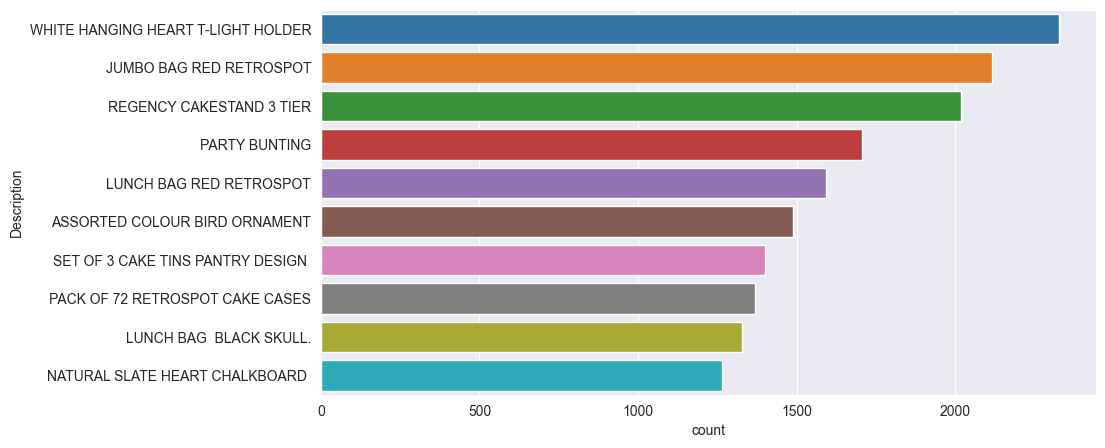

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Description", data=df, order=df["Description"].value_counts().iloc[:10].index)
plt.show()

In [26]:
# Percentage of the top 10 items
df["Description"].value_counts(normalize=True).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    0.004406
JUMBO BAG RED RETROSPOT               0.004005
REGENCY CAKESTAND 3 TIER              0.003823
PARTY BUNTING                         0.003232
LUNCH BAG RED RETROSPOT               0.003018
ASSORTED COLOUR BIRD ORNAMENT         0.002819
SET OF 3 CAKE TINS PANTRY DESIGN      0.002649
PACK OF 72 RETROSPOT CAKE CASES       0.002594
LUNCH BAG  BLACK SKULL.               0.002514
NATURAL SLATE HEART CHALKBOARD        0.002391
Name: Description, dtype: float64

## What are the most popular items in each country?

In [27]:
# Top 10 items in each country
df.groupby("Country")["Description"].value_counts().groupby(level=0).head(10)

Country      Description                        
Australia    RED TOADSTOOL LED NIGHT LIGHT          9
             SET OF 3 CAKE TINS PANTRY DESIGN       9
             PARTY BUNTING                          8
             BAKING SET SPACEBOY DESIGN             8
             LUNCH BAG SPACEBOY DESIGN              8
                                                   ..
Unspecified  12 PENCILS TALL TUBE RED RETROSPOT     3
             PLASTERS IN TIN STRONGMAN              3
             SET OF 60 I LOVE LONDON CAKE CASES     3
             SET OF 10 LED DOLLY LIGHTS             3
             SMALL HEART MEASURING SPOONS           3
Name: Description, Length: 380, dtype: int64

## What time of day do people buy more often?

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [29]:
# Hour of the day
df["Hour"] = df["InvoiceDate"].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8


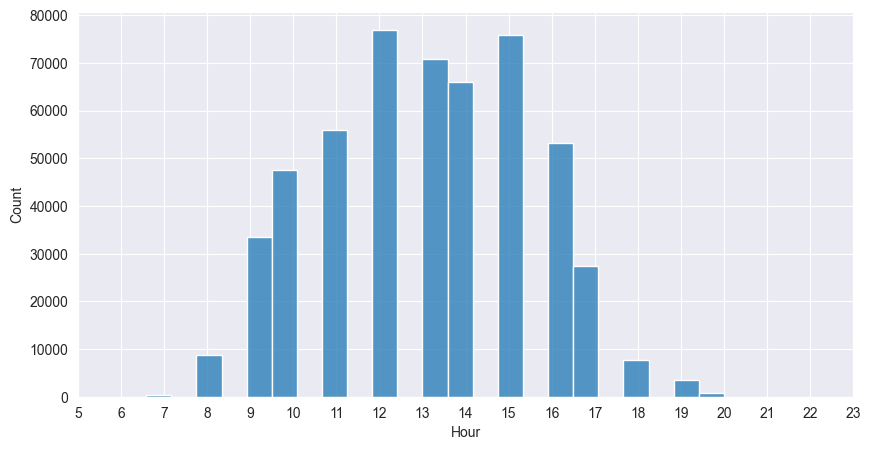

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="Hour", bins=24)
ax.set_xticks(range(5, 24))
ax.x_label = "Hour"
ax.y_label = "Count"
plt.show()

## What day of the week do people buy more often?

In [31]:
day_of_week = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek.map(day_of_week)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday


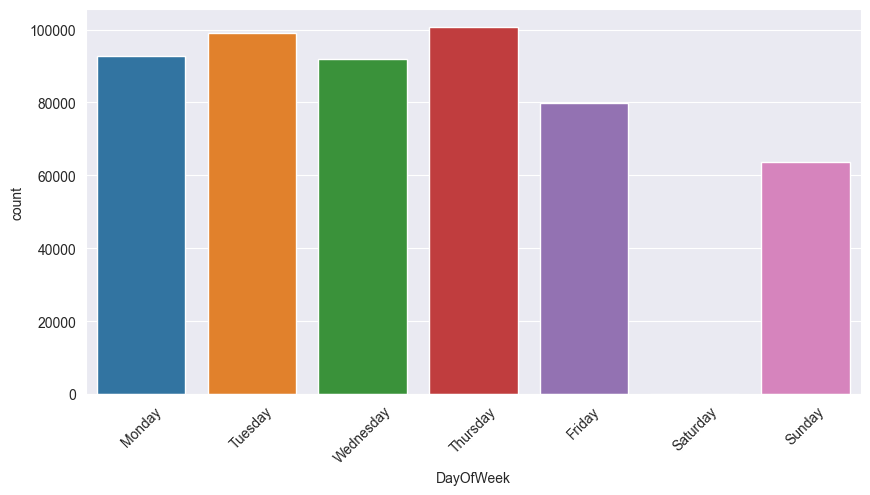

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="DayOfWeek", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.x_label = "Day of Week"
ax.y_label = "Count"
plt.show()

## What month do people buy more often?

In [33]:
df["Month"] = df["InvoiceDate"].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,Wednesday,12


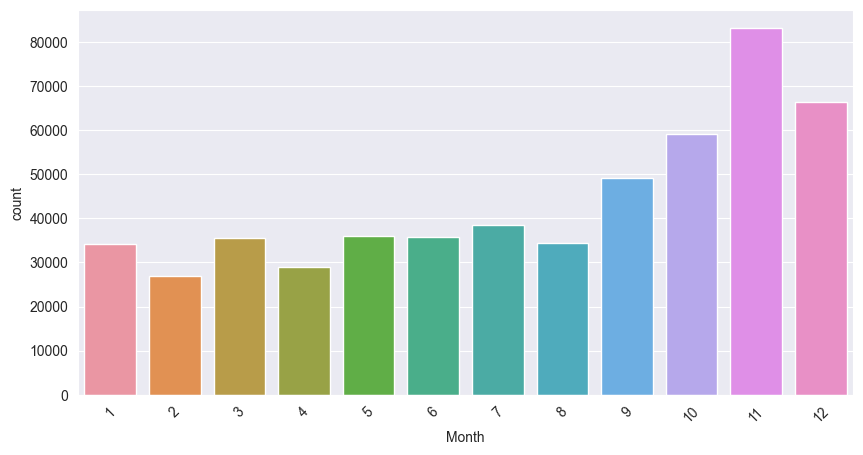

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Month", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.x_label = "Month"
ax.y_label = "Count"
plt.show()

## How many items does each customer buy?

In [37]:
invoice_avg_quantity = df.groupby('InvoiceNo').agg({'Quantity': 'mean'}).reset_index()
invoice_avg_quantity.head()

,InvoiceNo,Quantity
0,536365,5.714286
1,536366,6.000000
2,536367,6.916667
3,536368,3.750000
4,536369,3.000000


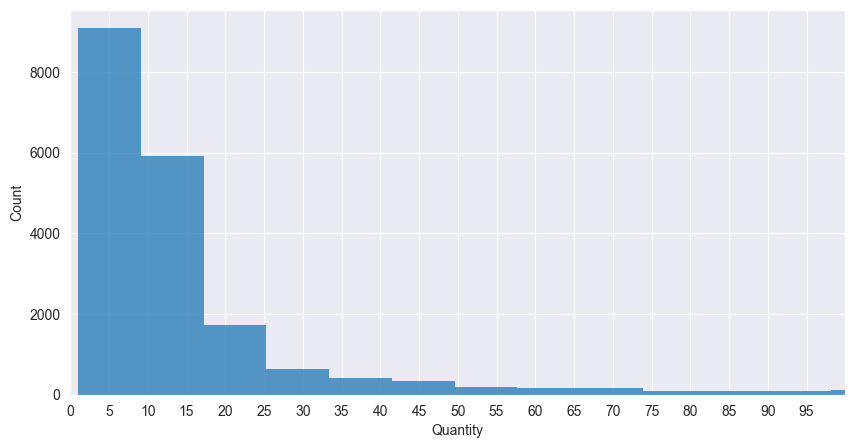

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=invoice_avg_quantity, x="Quantity", bins=10000)
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 100, 5))
ax.x_label = "Quantity"
ax.y_label = "Count"
plt.show()



## What is the average value per order?

In [46]:
df["Value"] = df["Quantity"] * df["UnitPrice"]

invoice_avg_value = df.groupby("InvoiceNo")["Value"].mean().reset_index()
invoice_avg_value.head()

,InvoiceNo,Value
0,536365,19.874286
1,536366,11.100000
2,536367,23.227500
3,536368,17.512500
4,536369,17.850000


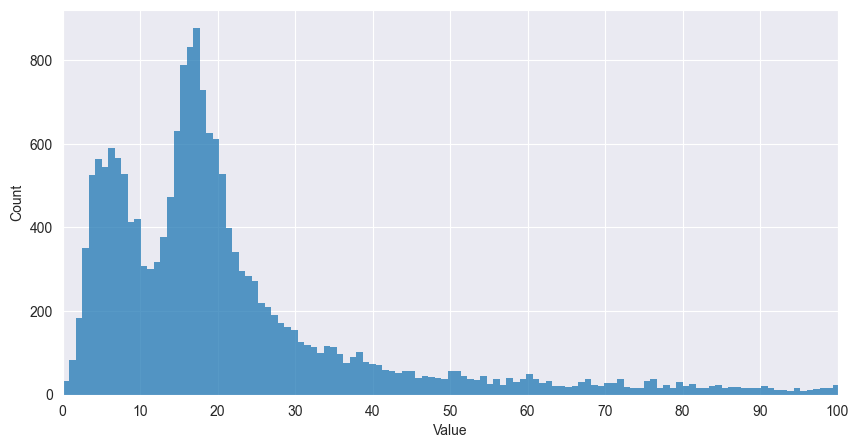

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=invoice_avg_value, x="Value", bins=200000)
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 10))
ax.x_label = "Value"
ax.y_label = "Count"
plt.show()

## How much money do customers spend on average?

In [49]:
customer_avg_value = df.groupby("CustomerID")["Value"].mean().reset_index()
customer_avg_value.head()

,CustomerID,Value
0,12346.0,77183.600000
1,12347.0,23.681319
2,12348.0,53.231111
3,12349.0,20.243750
4,12350.0,18.400000


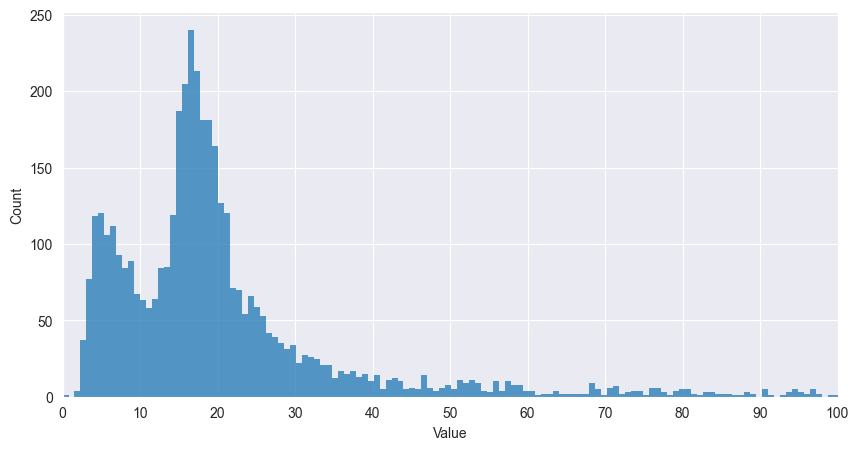

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=customer_avg_value, x="Value", bins=100000)
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 10))
ax.x_label = "Value"
ax.y_label = "Count"
plt.show()

## Which countries do they sell their goods to?

In [54]:
import plotly.express as px

fig = px.treemap(df, path=["Country"], values="Quantity", title="Quantity of items sold by country")
fig.show()

In [55]:
fig = px.treemap(df, path=["Country"], values="Value", title="Value of items sold by country")
fig.show()

In [56]:
df.shape

(528140, 14)

In [57]:
# Save the clean data
df.to_csv("data/retail_clean.csv", index=False)